In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/human_data.csv")
X = df["sequence"]  # DNA sequences
y = df["class"]     # classes (0 to 6)
df.head(11)

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
5,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
6,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3
7,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
8,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3
9,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3


In [ ]:
# Generating k-mers from DNA sequences
def generate_kmers(sequence, k):
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    return ' '.join(kmers)

k = 9
kmers = [generate_kmers(seq, k) for seq in X]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(kmers)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

0     531
1     534
2     349
3     672
4     711
5     240
6    1343
Name: class, dtype: int64
Total Samples :  4380




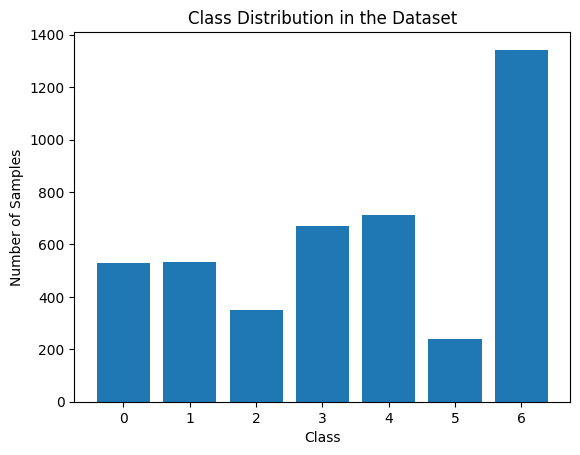

In [ ]:
class_counts = y.value_counts().sort_index()
print(class_counts)
print("Total Samples : ",np.sum(y.value_counts()))
print("\n")
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

0    265
1    267
2    175
3    336
4    355
5    120
6    672
Name: class, dtype: int64
Total Samples :  2190




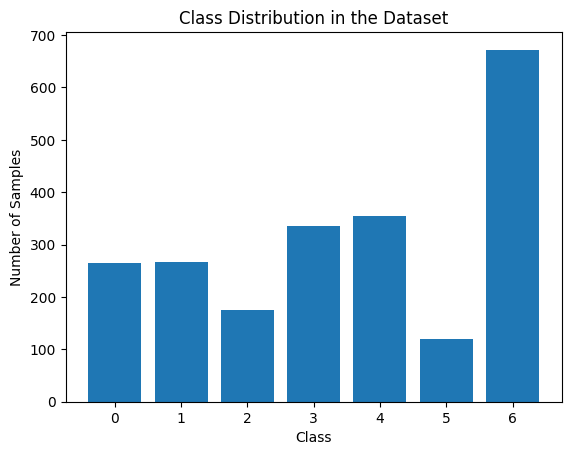

In [ ]:
class_counts = y_train.value_counts().sort_index()
print(class_counts)
print("Total Samples : ",np.sum(y_train.value_counts()))
print("\n")
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

0     53
1     54
2     35
3     67
4     71
5     24
6    134
Name: class, dtype: int64
Total Samples :  438




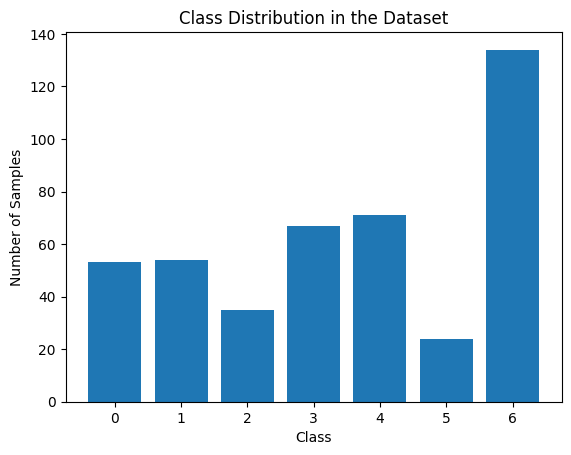

In [ ]:
class_counts = y_test.value_counts().sort_index()
print(class_counts)
print("Total Samples : ",np.sum(y_test.value_counts()))
print("\n")
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

0    213
1    213
2    139
3    269
4    285
5     96
6    537
Name: class, dtype: int64
Total Samples :  1752




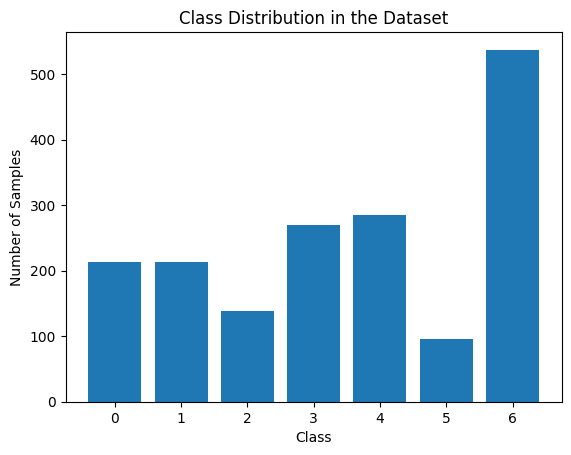

In [ ]:
class_counts = y_val.value_counts().sort_index()
print(class_counts)
print("Total Samples : ",np.sum(y_val.value_counts()))
print("\n")
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

In [ ]:
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
xgb_classifier = XGBClassifier()
nb_classifier = MultinomialNB()

svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
svm_predictions = svm_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
svm_report = classification_report(y_test, svm_predictions, target_names=['0','1','2','3','4','5','6'])
dt_report = classification_report(y_test, dt_predictions, target_names=['0','1','2','3','4','5','6'])
rf_report = classification_report(y_test, rf_predictions, target_names=['0','1','2','3','4','5','6'])
knn_report =  classification_report(y_test, knn_predictions, target_names=['0','1','2','3','4','5','6'])
xgb_report = classification_report(y_test, xgb_predictions, target_names=['0','1','2','3','4','5','6'])
nb_report = classification_report(y_test, nb_predictions, target_names=['0','1','2','3','4','5','6'])

svm_confusion = confusion_matrix(y_test, svm_predictions)
dt_confusion = confusion_matrix(y_test, dt_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)
knn_confusion = confusion_matrix(y_test, knn_predictions)
xgb_confusion = confusion_matrix(y_test, xgb_predictions)
nb_confusion = confusion_matrix(y_test, nb_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test,xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test,nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print("SVM Classification Report:\n")
print(svm_report)
print("SVM Confusion Matrix:\n")
print(svm_confusion)

print("\n\nDecision Tree Classification Report:\n")
print(dt_report)
print("Decision Tree Confusion Matrix:\n")
print(dt_confusion)


print("\n\nRandom Forest Classification Report:\n")
print(rf_report)
print("Random Forest Confusion Matrix:\n")
print(rf_confusion)


print("\n\nKNN Classification Report:\n")
print(knn_report)
print("KNN Confusion Matrix:\n")
print(knn_confusion)

print("XGB Classification Report:\n")
print(xgb_report)
print("XGB Confusion Matrix:\n")
print(xgb_confusion)

print("Naive Bayes Classification Report:\n")
print(nb_report)
print("Naive Bayes Confusion Matrix:\n")
print(nb_confusion)

SVM Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        53
           1       1.00      0.74      0.85        54
           2       1.00      0.51      0.68        35
           3       1.00      0.55      0.71        67
           4       1.00      0.65      0.79        71
           5       1.00      0.54      0.70        24
           6       0.54      1.00      0.70       134

    accuracy                           0.74       438
   macro avg       0.93      0.67      0.75       438
weighted avg       0.86      0.74      0.74       438

SVM Confusion Matrix:

[[ 35   0   0   0   0   0  18]
 [  0  40   0   0   0   0  14]
 [  0   0  18   0   0   0  17]
 [  0   0   0  37   0   0  30]
 [  0   0   0   0  46   0  25]
 [  0   0   0   0   0  13  11]
 [  0   0   0   0   0   0 134]]


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.79      

In [ ]:
results = {}

results['SVM'] = {
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1 Score': svm_f1
}

results['Decision Tree'] = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1
}

results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1
}

results['KNN'] = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}

results['XGB'] = {
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1
}

results['NB'] = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1 Score': nb_f1
}

print("Machine Learning Algorithm Results (without Cross-Validation)\n:")
for algorithm, metrics in results.items():
    print(f"{algorithm} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Machine Learning Algorithm Results (without Cross-Validation)
:
SVM Metrics:
Accuracy: 0.7374429223744292
Precision: 0.8587042232858374
Recall: 0.7374429223744292
F1 Score: 0.744342779212543

Decision Tree Metrics:
Accuracy: 0.7602739726027398
Precision: 0.7827179167464627
Recall: 0.7602739726027398
F1 Score: 0.7660220729374223

Random Forest Metrics:
Accuracy: 0.865296803652968
Precision: 0.8842378108507093
Recall: 0.865296803652968
F1 Score: 0.8664339707566806

KNN Metrics:
Accuracy: 0.684931506849315
Precision: 0.8695000315636638
Recall: 0.684931506849315
F1 Score: 0.7210044552482611

XGB Metrics:
Accuracy: 0.8401826484018264
Precision: 0.8607711844131306
Recall: 0.8401826484018264
F1 Score: 0.8409271331369503

NB Metrics:
Accuracy: 0.9406392694063926
Precision: 0.9486178084660514
Recall: 0.9406392694063926
F1 Score: 0.9424228658381681



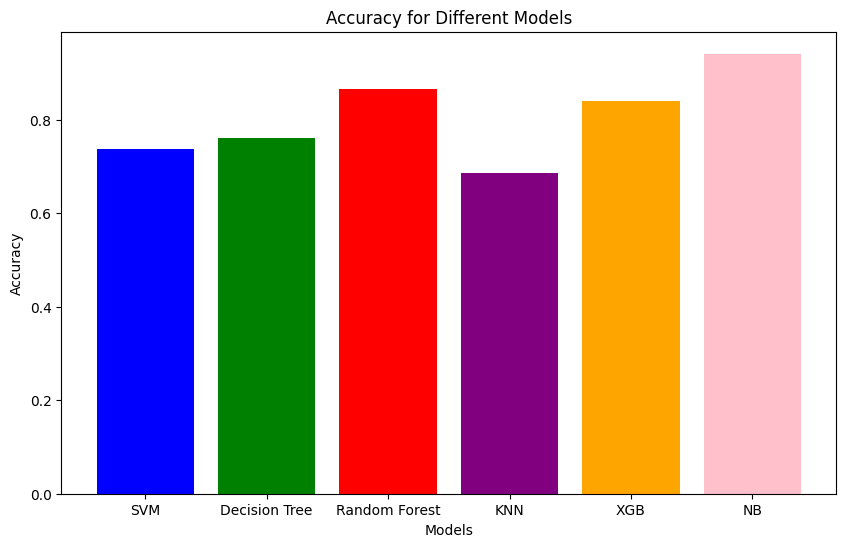

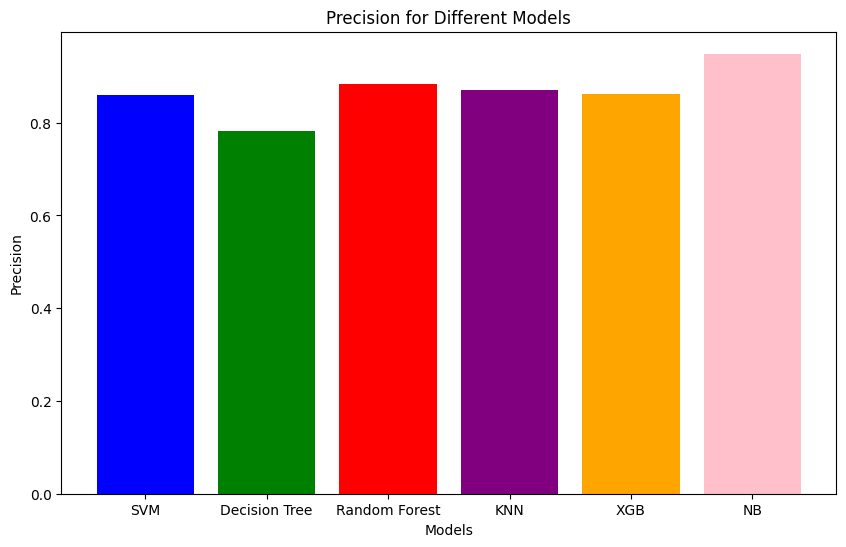

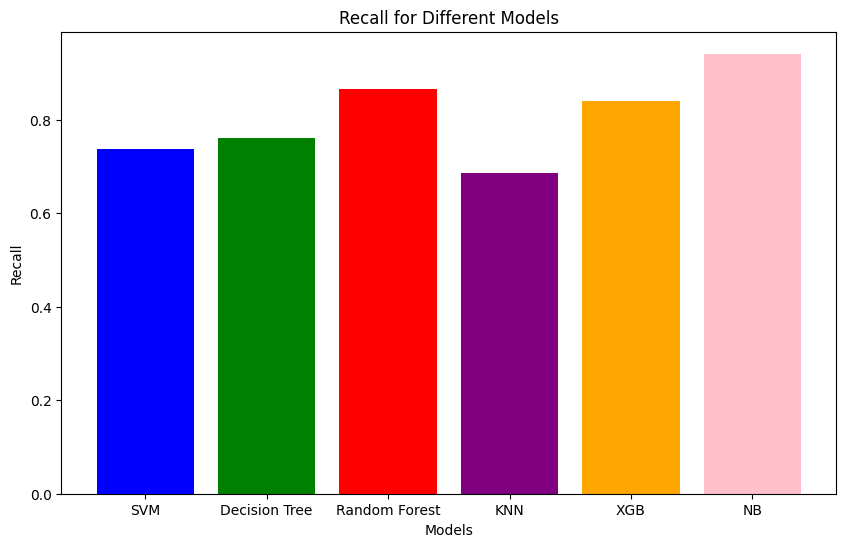

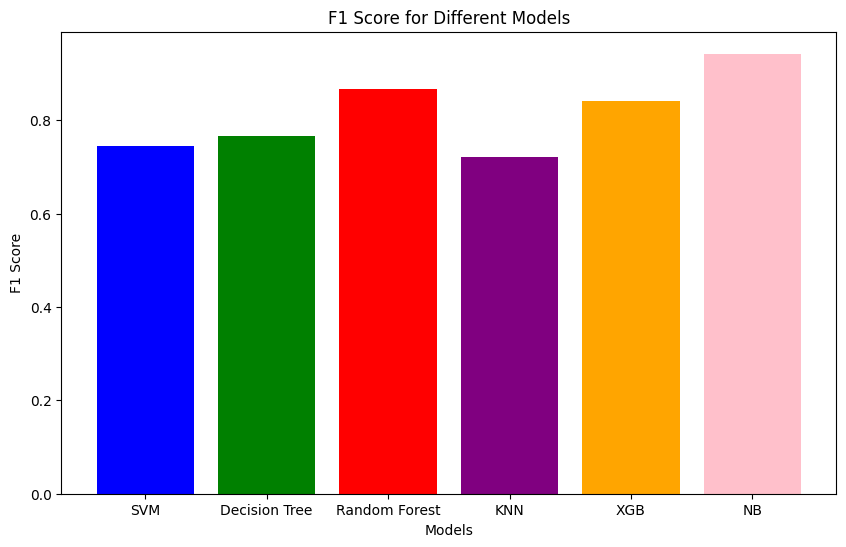

In [ ]:
models = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    values = [results[model][metric] for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.show()

In [ ]:
kf = KFold(n_splits=10)

skf = StratifiedKFold(n_splits=10)

ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

In [ ]:
# SVM with K-Fold
svm_cv_accuracy_kf = cross_val_score(svm_classifier, X_val, y_val, cv=kf, scoring='accuracy')
svm_cv_precision_kf = cross_val_score(svm_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
svm_cv_recall_kf = cross_val_score(svm_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
svm_cv_f1_kf = cross_val_score(svm_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

# Decision Tree with K-Fold
dt_cv_accuracy_kf = cross_val_score(dt_classifier, X_val, y_val, cv=kf, scoring='accuracy')
dt_cv_precision_kf = cross_val_score(dt_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
dt_cv_recall_kf = cross_val_score(dt_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
dt_cv_f1_kf = cross_val_score(dt_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

# Random Forest with K-Fold
rf_cv_accuracy_kf = cross_val_score(rf_classifier, X_val, y_val, cv=kf, scoring='accuracy')
rf_cv_precision_kf = cross_val_score(rf_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
rf_cv_recall_kf = cross_val_score(rf_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
rf_cv_f1_kf = cross_val_score(rf_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

# KNN with K-Fold
knn_cv_accuracy_kf = cross_val_score(knn_classifier, X_val, y_val, cv=kf, scoring='accuracy')
knn_cv_precision_kf = cross_val_score(knn_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
knn_cv_recall_kf = cross_val_score(knn_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
knn_cv_f1_kf = cross_val_score(knn_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

# XGB with K-Fold
xgb_cv_accuracy_kf = cross_val_score(xgb_classifier, X_val, y_val, cv=kf, scoring='accuracy')
xgb_cv_precision_kf = cross_val_score(xgb_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
xgb_cv_recall_kf = cross_val_score(xgb_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
xgb_cv_f1_kf = cross_val_score(xgb_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

# Naive Bayes for K-Fold
nb_cv_accuracy_kf = cross_val_score(nb_classifier, X_val, y_val, cv=kf, scoring='accuracy')
nb_cv_precision_kf = cross_val_score(nb_classifier, X_val, y_val, cv=kf, scoring='precision_weighted')
nb_cv_recall_kf = cross_val_score(nb_classifier, X_val, y_val, cv=kf, scoring='recall_weighted')
nb_cv_f1_kf = cross_val_score(nb_classifier, X_val, y_val, cv=kf, scoring='f1_weighted')

In [ ]:
results_cv_kf = {}

results_cv_kf['SVM'] = {
    'Accuracy': np.mean(svm_cv_accuracy_kf),
    'Precision': np.mean(svm_cv_precision_kf),
    'Recall': np.mean(svm_cv_recall_kf),
    'F1 Score': np.mean(svm_cv_f1_kf)
}

results_cv_kf['Decision Tree'] = {
    'Accuracy': np.mean(dt_cv_accuracy_kf),
    'Precision': np.mean(dt_cv_precision_kf),
    'Recall': np.mean(dt_cv_recall_kf),
    'F1 Score': np.mean(dt_cv_f1_kf)
}

results_cv_kf['Random Forest'] = {
    'Accuracy': np.mean(rf_cv_accuracy_kf),
    'Precision': np.mean(rf_cv_precision_kf),
    'Recall': np.mean(rf_cv_recall_kf),
    'F1 Score': np.mean(rf_cv_f1_kf)
}

results_cv_kf['KNN'] = {
    'Accuracy': np.mean(knn_cv_accuracy_kf),
    'Precision': np.mean(knn_cv_precision_kf),
    'Recall': np.mean(knn_cv_recall_kf),
    'F1 Score': np.mean(knn_cv_f1_kf)
}

results_cv_kf['XGB'] = {
    'Accuracy': np.mean(xgb_cv_accuracy_kf),
    'Precision': np.mean(xgb_cv_precision_kf),
    'Recall': np.mean(xgb_cv_recall_kf),
    'F1 Score': np.mean(xgb_cv_f1_kf)
}

results_cv_kf['NB'] = {
    'Accuracy': np.mean(nb_cv_accuracy_kf),
    'Precision': np.mean(nb_cv_precision_kf),
     'Recall' : np.mean(nb_cv_recall_kf),
    'F1 Score': np.mean(nb_cv_f1_kf)
}

print("Machine Learning Algorithm Results (with K-Fold Cross-Validation):")
for algorithm, metrics in results_cv_kf.items():
    print(f"{algorithm} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Machine Learning Algorithm Results (with K-Fold Cross-Validation):
SVM Metrics:
Accuracy: 0.6546655844155843
Precision: 0.8389129410789786
Recall: 0.6546655844155843
F1 Score: 0.655367613225112

Decision Tree Metrics:
Accuracy: 0.7140454545454544
Precision: 0.7220920979196814
Recall: 0.7140454545454544
F1 Score: 0.7168076957718987

Random Forest Metrics:
Accuracy: 0.7676915584415585
Precision: 0.8541261906191153
Recall: 0.7676915584415585
F1 Score: 0.7815175126138437

KNN Metrics:
Accuracy: 0.6518538961038961
Precision: 0.7833936145431993
Recall: 0.6518538961038961
F1 Score: 0.6525700506660279

XGB Metrics:
Accuracy: 0.7956590909090909
Precision: 0.828646389601146
Recall: 0.7956590909090909
F1 Score: 0.7945022105786543

NB Metrics:
Accuracy: 0.9018279220779221
Precision: 0.9140383164427585
Recall: 0.9018279220779221
F1 Score: 0.9036918067738613



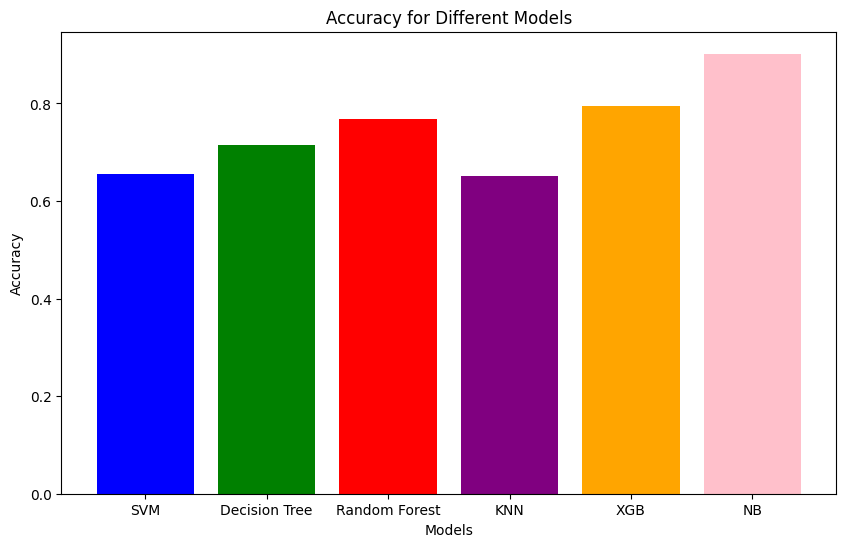

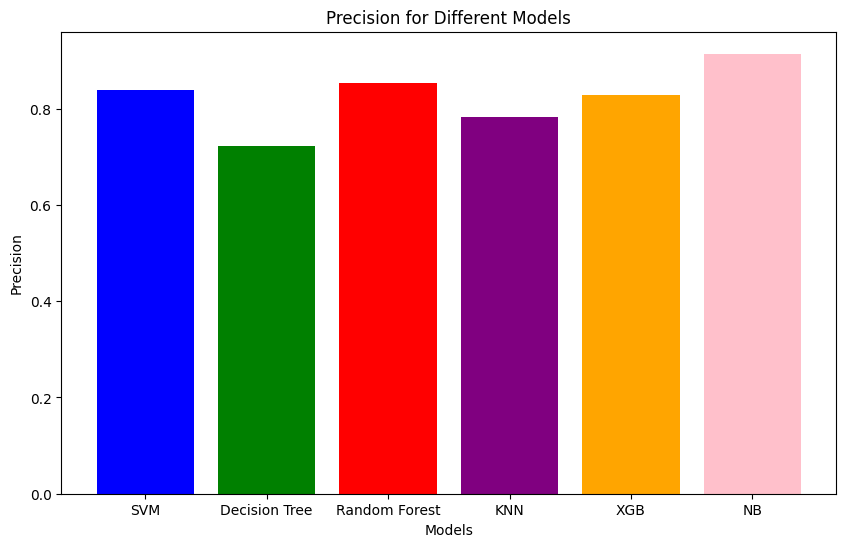

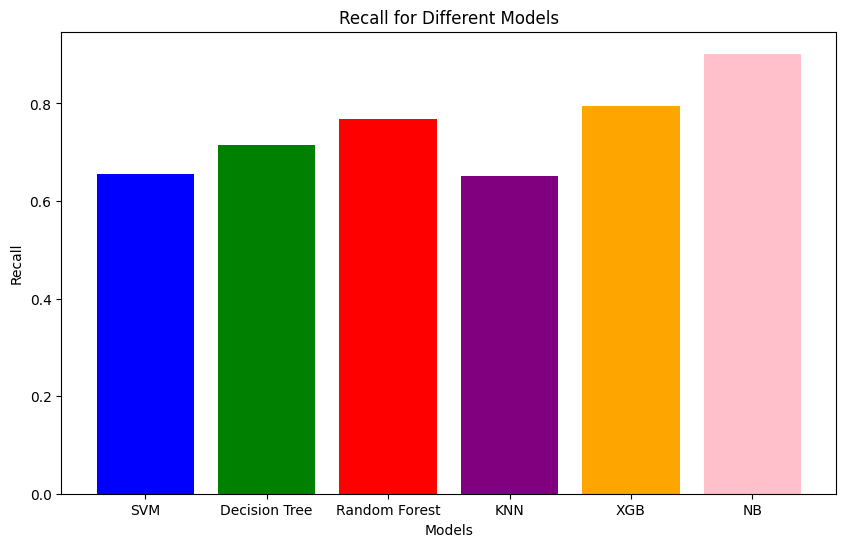

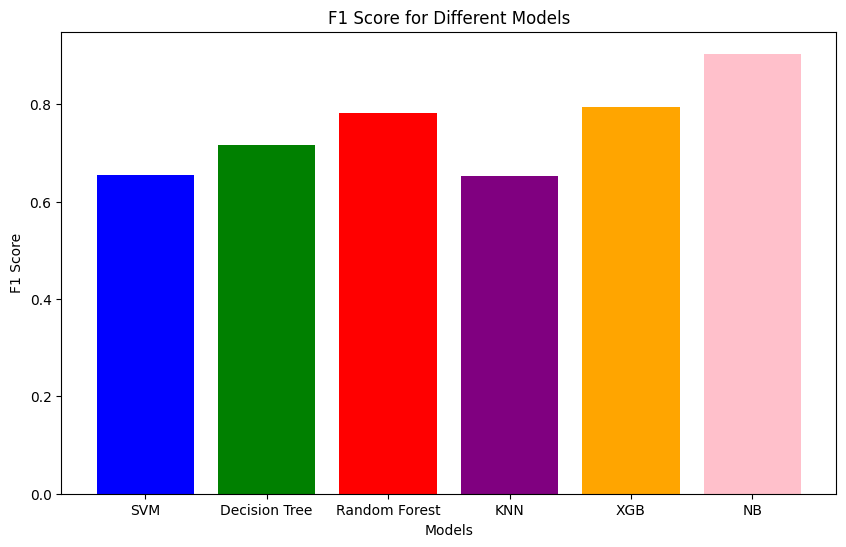

In [ ]:
models = list(results_cv_kf.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    values = [results_cv_kf[model][metric] for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.show()

In [ ]:
# SVM with Stratified K-Fold
svm_cv_accuracy_skf = cross_val_score(svm_classifier, X_val, y_val, cv=skf, scoring='accuracy')
svm_cv_precision_skf = cross_val_score(svm_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
svm_cv_recall_skf = cross_val_score(svm_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
svm_cv_f1_skf = cross_val_score(svm_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

# Decision Tree with Stratified K-Fold
dt_cv_accuracy_skf = cross_val_score(dt_classifier, X_val, y_val, cv=skf, scoring='accuracy')
dt_cv_precision_skf = cross_val_score(dt_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
dt_cv_recall_skf = cross_val_score(dt_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
dt_cv_f1_skf = cross_val_score(dt_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

# Random Forest with Stratified K-Fold
rf_cv_accuracy_skf = cross_val_score(rf_classifier, X_val, y_val, cv=skf, scoring='accuracy')
rf_cv_precision_skf = cross_val_score(rf_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
rf_cv_recall_skf = cross_val_score(rf_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
rf_cv_f1_skf = cross_val_score(rf_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

# k-Nearest Neighbors with Stratified K-Fold
knn_cv_accuracy_skf = cross_val_score(knn_classifier, X_val, y_val, cv=skf, scoring='accuracy')
knn_cv_precision_skf = cross_val_score(knn_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
knn_cv_recall_skf = cross_val_score(knn_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
knn_cv_f1_skf = cross_val_score(knn_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

# XGBoost with Stratified K-Fold
xgb_cv_accuracy_skf = cross_val_score(xgb_classifier, X_val, y_val, cv=skf, scoring='accuracy')
xgb_cv_precision_skf = cross_val_score(xgb_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
xgb_cv_recall_skf = cross_val_score(xgb_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
xgb_cv_f1_skf = cross_val_score(xgb_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

# Naive Bayes with Stratified K-Fold
nb_cv_accuracy_skf = cross_val_score(nb_classifier, X_val, y_val, cv=skf, scoring='accuracy')
nb_cv_precision_skf = cross_val_score(nb_classifier, X_val, y_val, cv=skf, scoring='precision_weighted')
nb_cv_recall_skf = cross_val_score(nb_classifier, X_val, y_val, cv=skf, scoring='recall_weighted')
nb_cv_f1_skf = cross_val_score(nb_classifier, X_val, y_val, cv=skf, scoring='f1_weighted')

In [ ]:
results_cv_skf = {}

results_cv_skf['SVM'] = {
    'Accuracy': np.mean(svm_cv_accuracy_skf),
    'Precision': np.mean(svm_cv_precision_skf),
    'Recall': np.mean(svm_cv_recall_skf),
    'F1 Score': np.mean(svm_cv_f1_skf)
}

results_cv_skf['Decision Tree'] = {
    'Accuracy': np.mean(dt_cv_accuracy_skf),
    'Precision': np.mean(dt_cv_precision_skf),
    'Recall': np.mean(dt_cv_recall_skf),
    'F1 Score': np.mean(dt_cv_f1_skf)
}

results_cv_skf['Random Forest'] = {
    'Accuracy': np.mean(rf_cv_accuracy_skf),
    'Precision': np.mean(rf_cv_precision_skf),
    'Recall': np.mean(rf_cv_recall_skf),
    'F1 Score': np.mean(rf_cv_f1_skf)
}

results_cv_skf['KNN'] = {
    'Accuracy': np.mean(knn_cv_accuracy_skf),
    'Precision': np.mean(knn_cv_precision_skf),
    'Recall': np.mean(knn_cv_recall_skf),
    'F1 Score': np.mean(knn_cv_f1_skf)
}

results_cv_skf['XGB'] = {
    'Accuracy': np.mean(xgb_cv_accuracy_skf),
    'Precision': np.mean(xgb_cv_precision_skf),
    'Recall': np.mean(xgb_cv_recall_skf),
    'F1 Score': np.mean(xgb_cv_f1_skf)
}

results_cv_skf['NB'] = {
    'Accuracy': np.mean(nb_cv_accuracy_skf),
    'Precision': np.mean(nb_cv_precision_skf),
    'Recall': np.mean(nb_cv_recall_skf),
    'F1 Score': np.mean(nb_cv_f1_skf)
}


print("Machine Learning Algorithm Results (with Stratified K-Fold Cross-Validation):")
for algorithm, metrics in results_cv_skf.items():
    print(f"{algorithm} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Machine Learning Algorithm Results (with Stratified K-Fold Cross-Validation):
SVM Metrics:
Accuracy: 0.6621266233766233
Precision: 0.8395227244639807
Recall: 0.6621266233766233
F1 Score: 0.6624134293547452

Decision Tree Metrics:
Accuracy: 0.7163603896103896
Precision: 0.7356059173826841
Recall: 0.7163603896103896
F1 Score: 0.7186843854092376

Random Forest Metrics:
Accuracy: 0.7785551948051948
Precision: 0.8513372713857337
Recall: 0.7785551948051948
F1 Score: 0.7692681602432971

KNN Metrics:
Accuracy: 0.6421525974025974
Precision: 0.7829727966047049
Recall: 0.6421525974025974
F1 Score: 0.6440181748645836

XGB Metrics:
Accuracy: 0.7928181818181818
Precision: 0.819985275792001
Recall: 0.7928181818181818
F1 Score: 0.7907569096596581

NB Metrics:
Accuracy: 0.9047012987012986
Precision: 0.9158688457789624
Recall: 0.9047012987012986
F1 Score: 0.9064457824883261



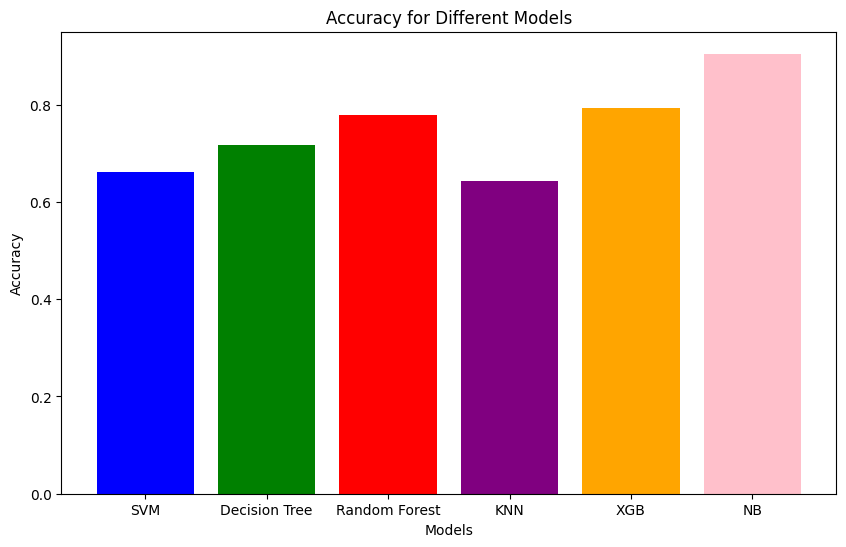

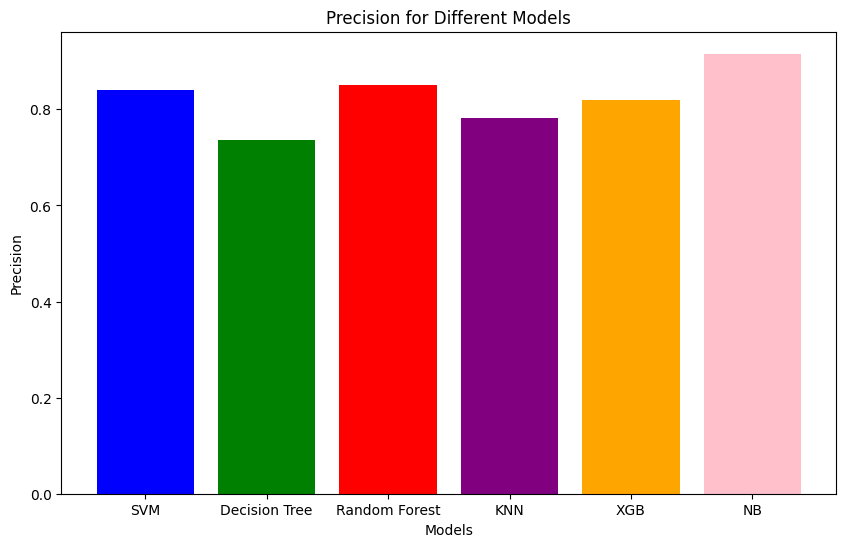

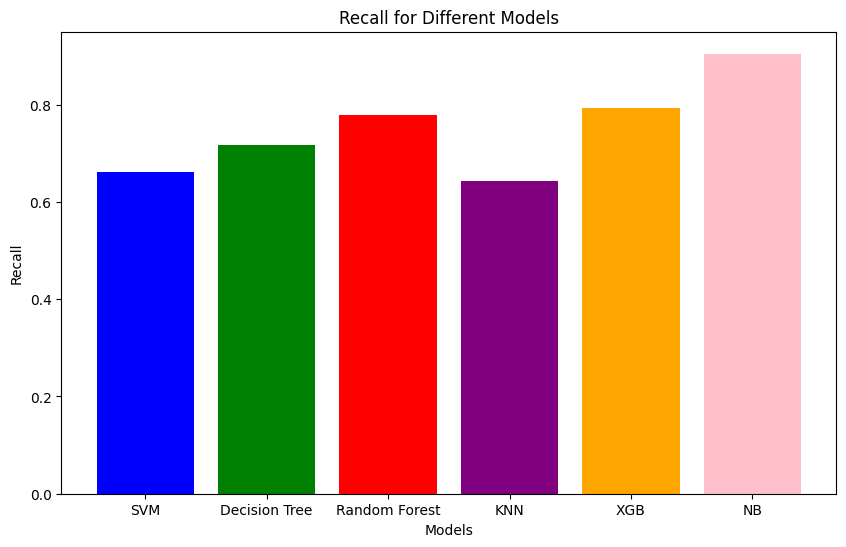

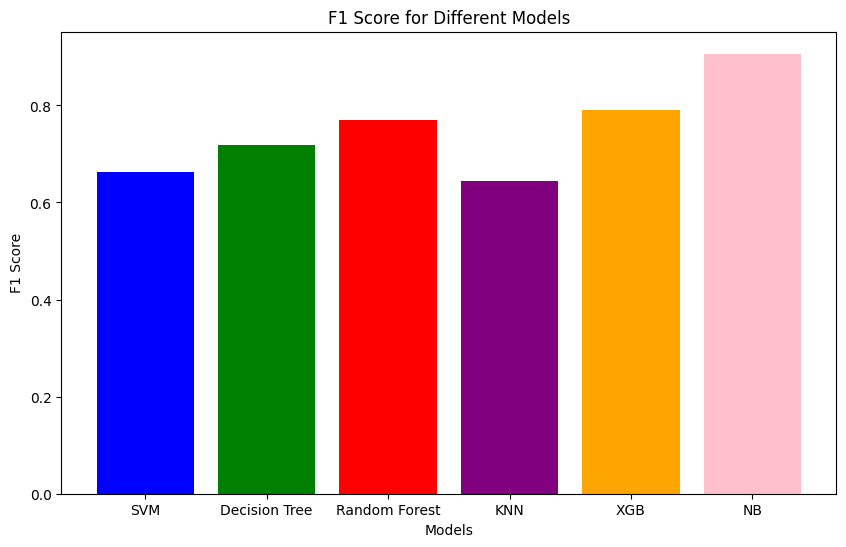

In [ ]:
models = list(results_cv_skf.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    values = [results_cv_skf[model][metric] for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.show()

In [ ]:
# SVM with Shuffle Split
svm_cv_accuracy_ss = cross_val_score(svm_classifier, X_val, y_val, cv=ss, scoring='accuracy')
svm_cv_precision_ss = cross_val_score(svm_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
svm_cv_recall_ss = cross_val_score(svm_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
svm_cv_f1_ss = cross_val_score(svm_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

# Decision Tree with Shuffle Split
dt_cv_accuracy_ss = cross_val_score(dt_classifier, X_val, y_val, cv=ss, scoring='accuracy')
dt_cv_precision_ss = cross_val_score(dt_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
dt_cv_recall_ss = cross_val_score(dt_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
dt_cv_f1_ss = cross_val_score(dt_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

# Random Forest with Shuffle Split
rf_cv_accuracy_ss = cross_val_score(rf_classifier, X_val, y_val, cv=ss, scoring='accuracy')
rf_cv_precision_ss = cross_val_score(rf_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
rf_cv_recall_ss = cross_val_score(rf_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
rf_cv_f1_ss = cross_val_score(rf_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

# k-Nearest Neighbors with Shuffle Split
knn_cv_accuracy_ss = cross_val_score(knn_classifier, X_val, y_val, cv=ss, scoring='accuracy')
knn_cv_precision_ss = cross_val_score(knn_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
knn_cv_recall_ss = cross_val_score(knn_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
knn_cv_f1_ss = cross_val_score(knn_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

# XGBoost with Shuffle Split
xgb_cv_accuracy_ss = cross_val_score(xgb_classifier, X_val, y_val, cv=ss, scoring='accuracy')
xgb_cv_precision_ss = cross_val_score(xgb_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
xgb_cv_recall_ss = cross_val_score(xgb_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
xgb_cv_f1_ss = cross_val_score(xgb_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

# Naive Bayes with Shuffle Split
nb_cv_accuracy_ss = cross_val_score(nb_classifier, X_val, y_val, cv=ss, scoring='accuracy')
nb_cv_precision_ss = cross_val_score(nb_classifier, X_val, y_val, cv=ss, scoring='precision_weighted')
nb_cv_recall_ss = cross_val_score(nb_classifier, X_val, y_val, cv=ss, scoring='recall_weighted')
nb_cv_f1_ss = cross_val_score(nb_classifier, X_val, y_val, cv=ss, scoring='f1_weighted')

In [ ]:
results_cv_ss = {}

results_cv_ss['SVM'] = {
    'Accuracy': np.mean(svm_cv_accuracy_ss),
    'Precision': np.mean(svm_cv_precision_ss),
    'Recall': np.mean(svm_cv_recall_ss),
    'F1 Score': np.mean(svm_cv_f1_ss)
}

results_cv_ss['Decision Tree'] = {
    'Accuracy': np.mean(dt_cv_accuracy_ss),
    'Precision': np.mean(dt_cv_precision_ss),
    'Recall': np.mean(dt_cv_recall_ss),
    'F1 Score': np.mean(dt_cv_f1_ss)
}

results_cv_ss['Random Forest'] = {
    'Accuracy': np.mean(rf_cv_accuracy_ss),
    'Precision': np.mean(rf_cv_precision_ss),
    'Recall': np.mean(rf_cv_recall_ss),
    'F1 Score': np.mean(rf_cv_f1_ss)
}

results_cv_ss['KNN'] = {
    'Accuracy': np.mean(knn_cv_accuracy_ss),
    'Precision': np.mean(knn_cv_precision_ss),
    'Recall': np.mean(knn_cv_recall_ss),
    'F1 Score': np.mean(knn_cv_f1_ss)
}


results_cv_ss['XGB'] = {
    'Accuracy': np.mean(xgb_cv_accuracy_ss),
    'Precision': np.mean(xgb_cv_precision_ss),
    'Recall': np.mean(xgb_cv_recall_ss),
    'F1 Score': np.mean(xgb_cv_f1_ss)
}

results_cv_ss['NB'] = {
    'Accuracy': np.mean(nb_cv_accuracy_ss),
    'Precision': np.mean(nb_cv_precision_ss),
    'Recall' : np.mean(nb_cv_recall_ss),
    'F1 Score': np.mean(nb_cv_f1_ss)
}

print("Machine Learning Algorithm Results (with Shuffle Split Cross-Validation):")
for algorithm, metrics in results_cv_ss.items():
    print(f"{algorithm} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Machine Learning Algorithm Results (with Shuffle Split Cross-Validation):
SVM Metrics:
Accuracy: 0.6738636363636363
Precision: 0.8402353465210594
Recall: 0.6738636363636363
F1 Score: 0.674761542362646

Decision Tree Metrics:
Accuracy: 0.7227272727272727
Precision: 0.7435944184295946
Recall: 0.7227272727272727
F1 Score: 0.7183792592448255

Random Forest Metrics:
Accuracy: 0.7829545454545455
Precision: 0.8553711249555176
Recall: 0.7829545454545455
F1 Score: 0.7846529993813943

KNN Metrics:
Accuracy: 0.6204545454545455
Precision: 0.8033740784525369
Recall: 0.6204545454545455
F1 Score: 0.6349080201185444

XGB Metrics:
Accuracy: 0.8039772727272728
Precision: 0.8365773615130037
Recall: 0.8039772727272728
F1 Score: 0.8038594902787193

NB Metrics:
Accuracy: 0.9125
Precision: 0.9226206575544527
Recall: 0.9125
F1 Score: 0.9144155053706186



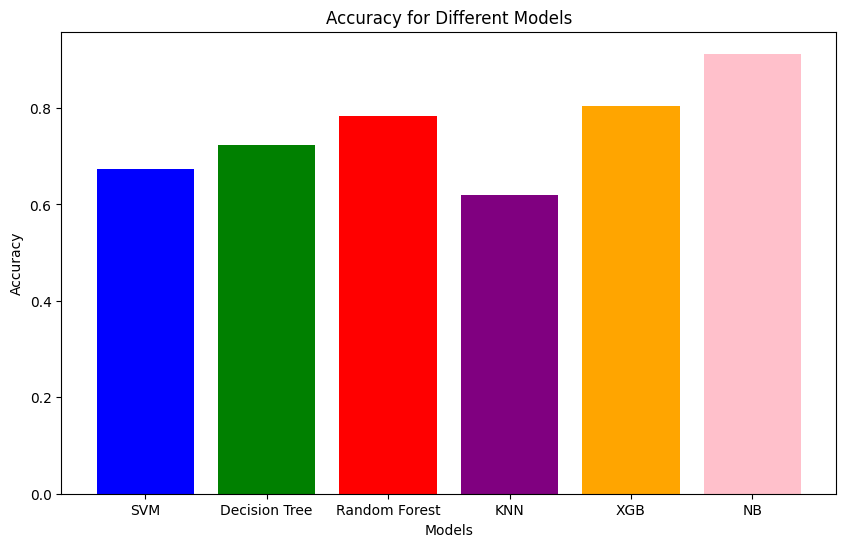

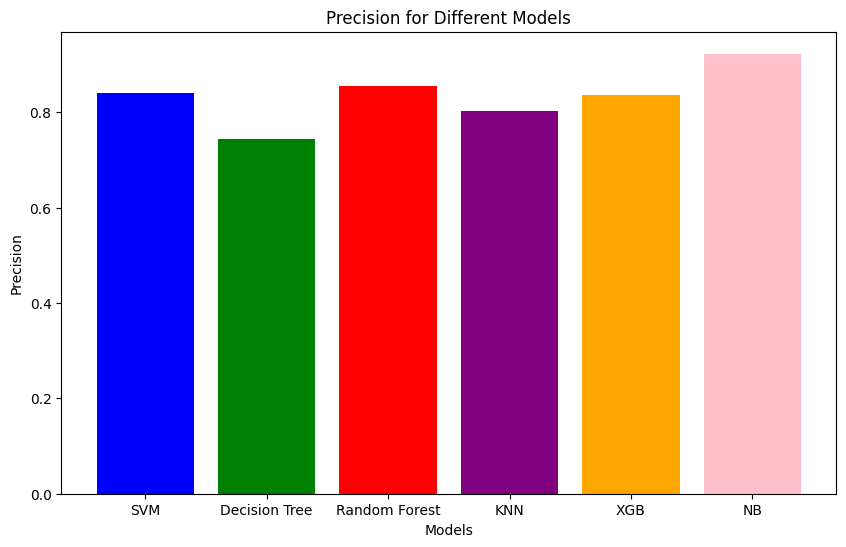

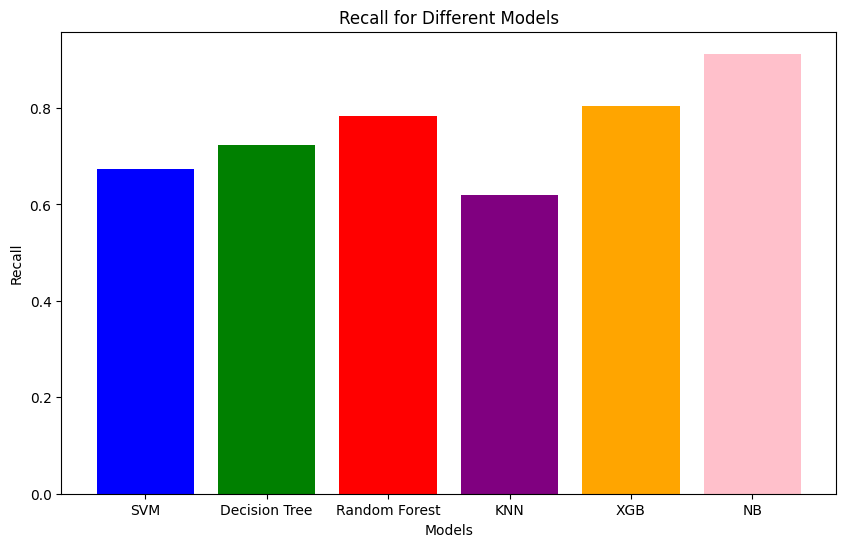

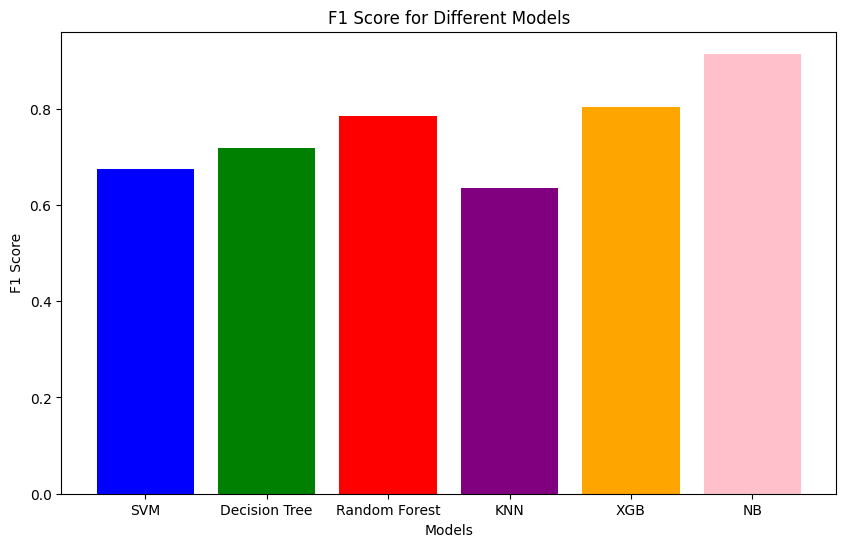

In [ ]:
models = list(results_cv_ss.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    values = [results_cv_ss[model][metric] for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.show()

In [ ]:
# SVM with Stratified Shuffle Split
svm_cv_accuracy_sss = cross_val_score(svm_classifier, X_val, y_val, cv=sss, scoring='accuracy')
svm_cv_precision_sss = cross_val_score(svm_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
svm_cv_recall_sss = cross_val_score(svm_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
svm_cv_f1_sss = cross_val_score(svm_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

# Decision Tree with Stratified  Shuffle Split
dt_cv_accuracy_sss = cross_val_score(dt_classifier, X_val, y_val, cv=sss, scoring='accuracy')
dt_cv_precision_sss = cross_val_score(dt_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
dt_cv_recall_sss = cross_val_score(dt_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
dt_cv_f1_sss = cross_val_score(dt_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

# Random Forest with Stratified Shuffle Split
rf_cv_accuracy_sss = cross_val_score(rf_classifier, X_val, y_val, cv=sss, scoring='accuracy')
rf_cv_precision_sss = cross_val_score(rf_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
rf_cv_recall_sss = cross_val_score(rf_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
rf_cv_f1_sss = cross_val_score(rf_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

# k-Nearest Neighbors Stratified with Shuffle Split
knn_cv_accuracy_sss = cross_val_score(knn_classifier, X_val, y_val, cv=sss, scoring='accuracy')
knn_cv_precision_sss = cross_val_score(knn_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
knn_cv_recall_sss = cross_val_score(knn_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
knn_cv_f1_sss = cross_val_score(knn_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

# XGBoost with Stratified Shuffle Split
xgb_cv_accuracy_sss = cross_val_score(xgb_classifier, X_val, y_val, cv=sss, scoring='accuracy')
xgb_cv_precision_sss = cross_val_score(xgb_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
xgb_cv_recall_sss = cross_val_score(xgb_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
xgb_cv_f1_sss = cross_val_score(xgb_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

# Naive Bayes with Stratified Shuffle Split
nb_cv_accuracy_sss = cross_val_score(nb_classifier, X_val, y_val, cv=sss, scoring='accuracy')
nb_cv_precision_sss = cross_val_score(nb_classifier, X_val, y_val, cv=sss, scoring='precision_weighted')
nb_cv_recall_sss = cross_val_score(nb_classifier, X_val, y_val, cv=sss, scoring='recall_weighted')
nb_cv_f1_sss = cross_val_score(nb_classifier, X_val, y_val, cv=sss, scoring='f1_weighted')

In [ ]:
results_cv_sss = {}

results_cv_sss['SVM'] = {
    'Accuracy': np.mean(svm_cv_accuracy_sss),
    'Precision': np.mean(svm_cv_precision_sss),
    'Recall': np.mean(svm_cv_recall_sss),
    'F1 Score': np.mean(svm_cv_f1_sss)
}

results_cv_sss['Decision Tree'] = {
    'Accuracy': np.mean(dt_cv_accuracy_sss),
    'Precision': np.mean(dt_cv_precision_sss),
    'Recall': np.mean(dt_cv_recall_sss),
    'F1 Score': np.mean(dt_cv_f1_sss)
}

results_cv_sss['Random Forest'] = {
    'Accuracy': np.mean(rf_cv_accuracy_sss),
    'Precision': np.mean(rf_cv_precision_sss),
    'Recall': np.mean(rf_cv_recall_sss),
    'F1 Score': np.mean(rf_cv_f1_sss)
}

results_cv_sss['KNN'] = {
    'Accuracy': np.mean(knn_cv_accuracy_sss),
    'Precision': np.mean(knn_cv_precision_sss),
    'Recall': np.mean(knn_cv_recall_sss),
    'F1 Score': np.mean(knn_cv_f1_sss)
}

results_cv_sss['XGB'] = {
    'Accuracy': np.mean(xgb_cv_accuracy_sss),
    'Precision': np.mean(xgb_cv_precision_sss),
     'Recall': np.mean(xgb_cv_recall_sss),
    'F1 Score': np.mean(xgb_cv_f1_sss)
}

results_cv_sss['NB'] = {
    'Accuracy': np.mean(nb_cv_accuracy_sss),
    'Precision': np.mean(nb_cv_precision_sss),
    'Recall' : np.mean(nb_cv_recall_sss),
    'F1 Score': np.mean(nb_cv_f1_sss)
}

print("Stratified Shuffle Split Cross-Validation Results:")
for algorithm, metrics in results_cv_sss.items():
    print(f"{algorithm} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Stratified Shuffle Split Cross-Validation Results:
SVM Metrics:
Accuracy: 0.6642045454545455
Precision: 0.8399434152551825
Recall: 0.6642045454545455
F1 Score: 0.6641038095912727

Decision Tree Metrics:
Accuracy: 0.7306818181818182
Precision: 0.7288178567229198
Recall: 0.7306818181818182
F1 Score: 0.7181090147911098

Random Forest Metrics:
Accuracy: 0.7801136363636363
Precision: 0.8569126807071612
Recall: 0.7801136363636363
F1 Score: 0.7859934968963032

KNN Metrics:
Accuracy: 0.6551136363636363
Precision: 0.7806504499334614
Recall: 0.6551136363636363
F1 Score: 0.6511167886861534

XGB Metrics:
Accuracy: 0.80625
Precision: 0.834896334301004
Recall: 0.80625
F1 Score: 0.8034908002368523

NB Metrics:
Accuracy: 0.9119318181818183
Precision: 0.9209016896055566
Recall: 0.9119318181818183
F1 Score: 0.9129103904553206



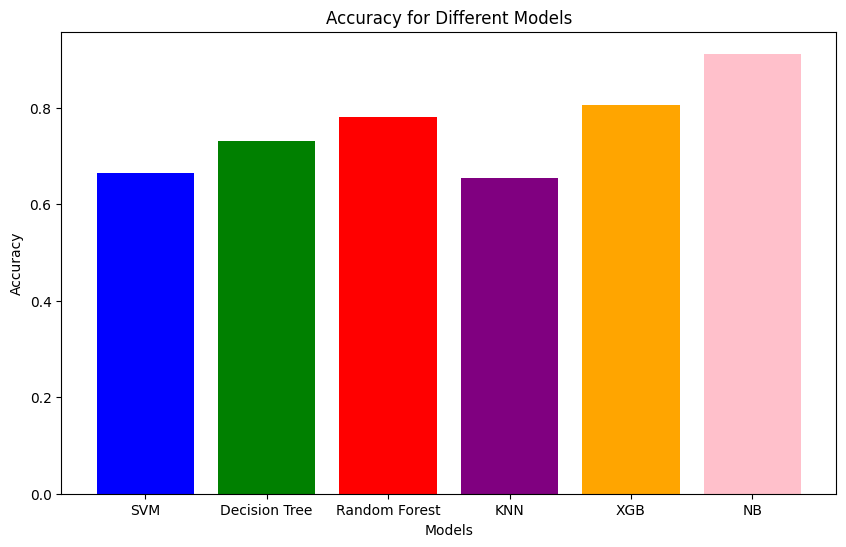

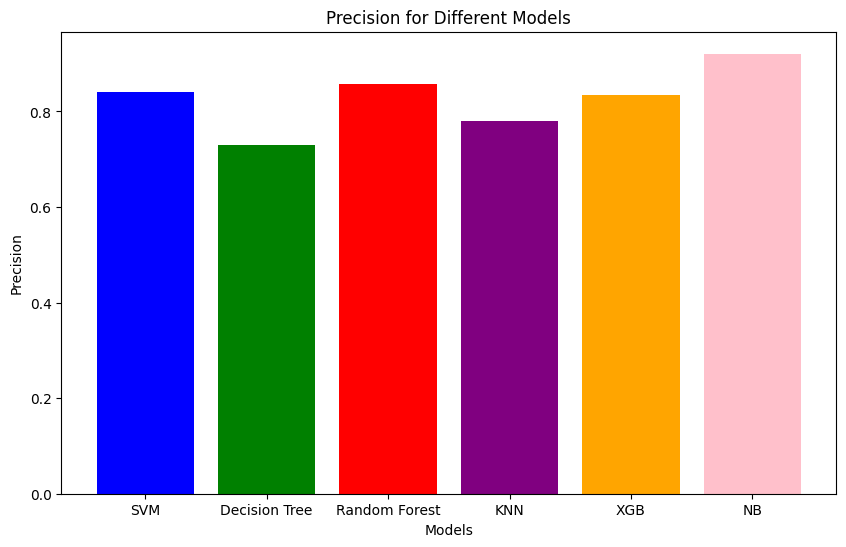

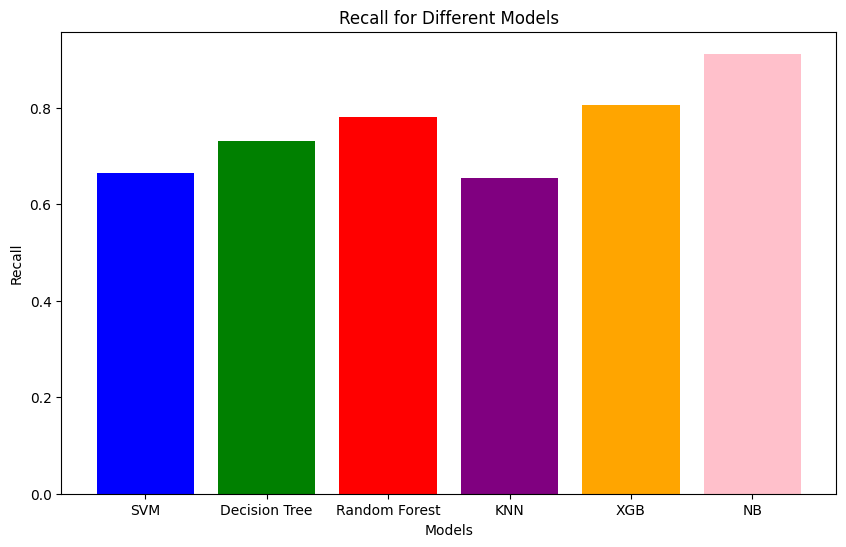

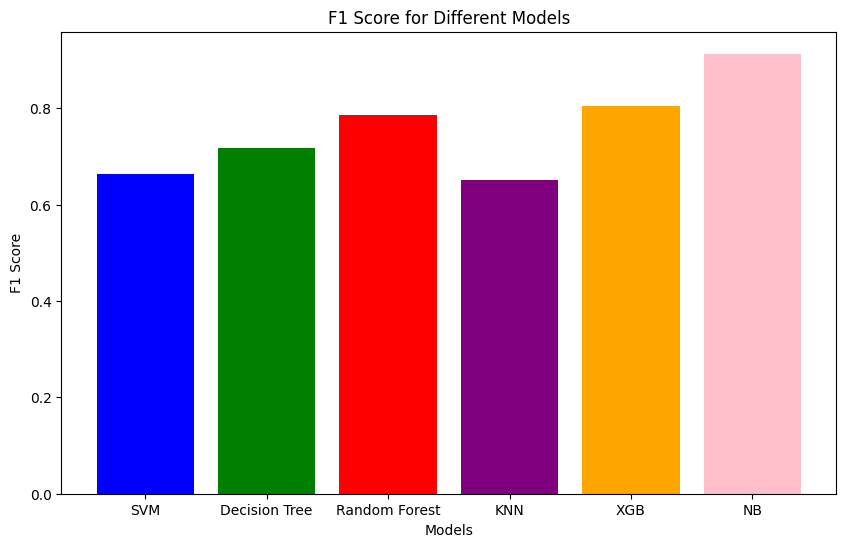

In [ ]:
models = list(results_cv_sss.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    values = [results_cv_sss[model][metric] for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.show()